In [1]:
import matplotlib.pyplot as plt
import xarray as xr

import opensense_data_downloader_and_transformer as oddt

# Single E-band CML data from Czech Republic
source: https://zenodo.org/record/5013463/

Note that this dataset contains much more than just the CML data, but for now we only parse the CML data.

In [2]:
oddt.download_fencl_2021_Eband_data(local_path='data/fencl_2021_Eband_data', print_output=True);

File already exists at desired location data/fencl_2021_Eband_data/Dataset_1.0.0.zip
Not downloading!


In [3]:
ds = oddt.tranform_fencl_2021_Eband_data('data/fencl_2021_Eband_data/Dataset_1.0.0.zip')
ds

<xarray.Dataset>
Dimensions:     (sublink_id: 2, time: 59328)
Coordinates:
  * time        (time) datetime64[ns] 2019-03-10 ... 2019-10-01T23:55:00
    cml_id      <U16 'cz_example_cml_1'
    length      float64 4.866
  * sublink_id  (sublink_id) <U2 'ab' 'ba'
    site_0_lon  float64 14.53
    site_1_lon  float64 14.53
    site_0_lat  float64 50.03
    site_1_lat  float64 50.03
Data variables:
    tl          (sublink_id, time) float64 50.3 50.3 50.2 ... 50.2 50.2 50.3
    frequency   (sublink_id) float64 73.5 83.5
Attributes:
    title:                 NA
    file author/s:         NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

In [5]:
ds = oddt.check_existence_of_required_vars(ds)

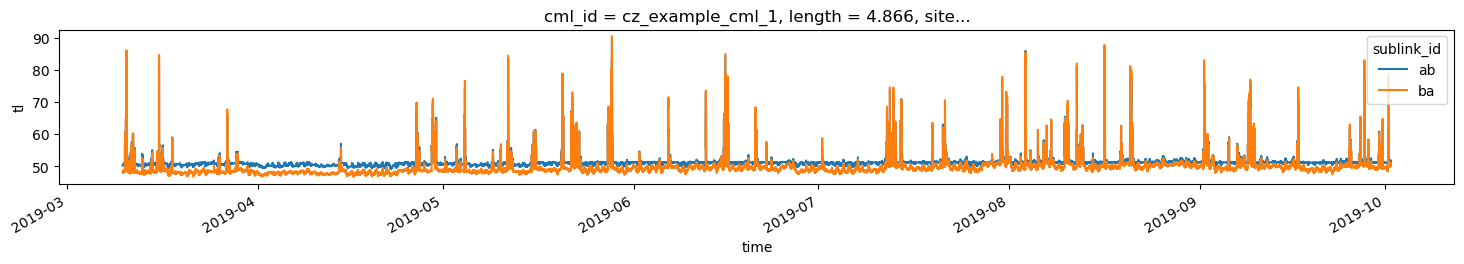

In [4]:
ds.tl.plot.line(x='time', figsize=(18,2));

# Data from 6 Eband CMLs from Czech Republic
source: https://zenodo.org/record/4090953

Note that coordinates are rounded.

In [14]:
oddt.download_fencl_2020_Eband_data(
    local_path='data/fencl_2020_Eband_CML',
    print_output=True,
)

Creating path data/fencl_2020_Eband_CML
to data/fencl_2020_Eband_CML/dataset.zip


('data/fencl_2020_Eband_CML/dataset.zip',
 <http.client.HTTPMessage at 0x10bf52ad0>)

In [15]:
ds_list = oddt.transform_fencl_2020_Eband_data('data/fencl_2020_Eband_CML/dataset.zip')

Parsing raw data from raw/commercial_microwave_links_total_loss/1a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/1b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6b.csv


## Plot the time series
Note that the two sublinks are combined manually because we do not store them in a joint `xarray.Dataset` to preserve the raw unequally spaced time stamps.

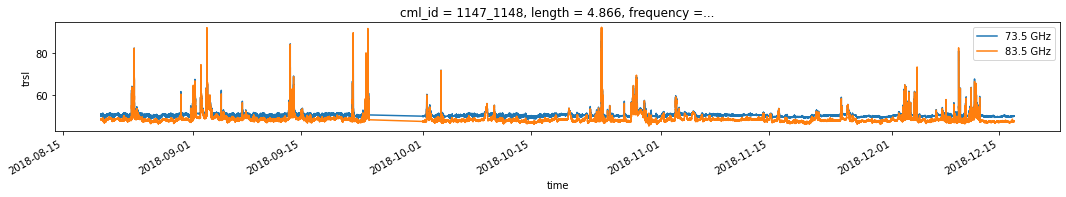

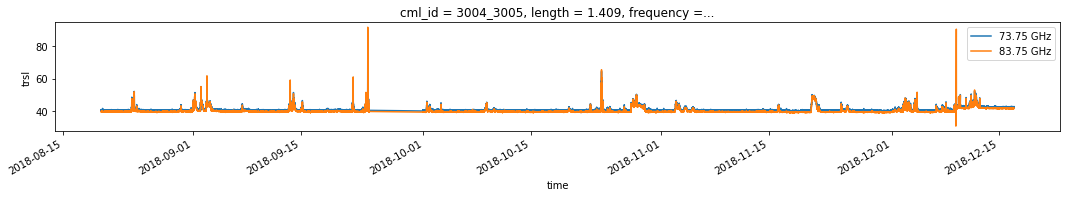

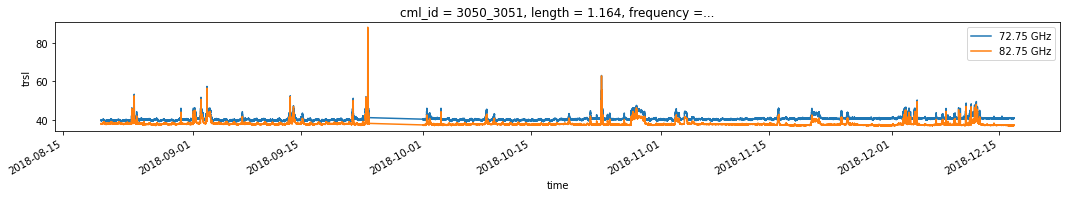

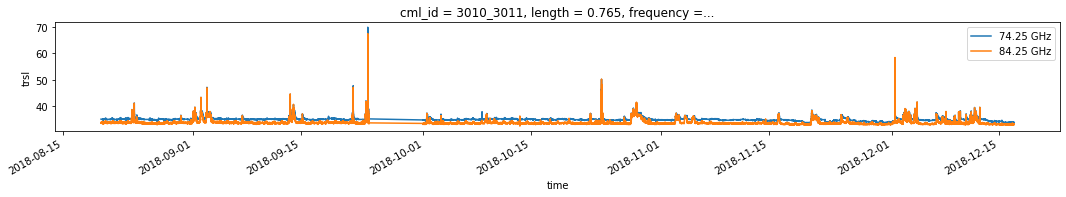

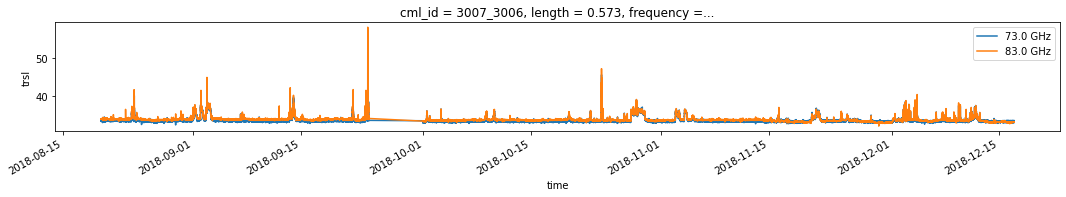

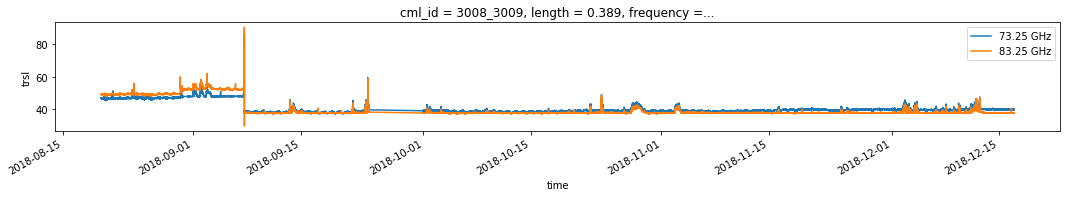

In [7]:
for i, ds in enumerate(ds_list):
    if i%2 == 0:
        fig, ax = plt.subplots(figsize=(18, 2))
    ds.tl.plot(x='time', ax=ax, label=f'{ds.frequency.values} GHz');
    plt.legend(loc=1)

# Example data from German CMLs with fake coordinates
Provided as example data in `pycomlink` https://github.com/pycomlink/pycomlink

In [6]:
oddt.download_data_file(
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
    local_path='data/pycomlink_example_data',
    print_output=True,
)

File already exists at desired location data/pycomlink_example_data/example_cml_data.nc
Not downloading!


In [10]:
ds = xr.open_dataset('data/pycomlink_example_data/example_cml_data.nc')
# add standard attributes
ds = oddt.add_cml_attributes(ds)
ds

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...
Attributes:
    title:                 NA
    file author/s:         NA
    institution:           NA
    date:                  NA
    source:                NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA
    comment:               NA

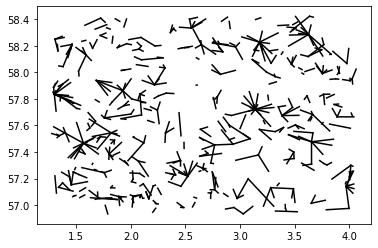

In [10]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds.site_a_longitude, 
    ds.site_a_latitude,
    ds.site_b_longitude, 
    ds.site_b_latitude):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

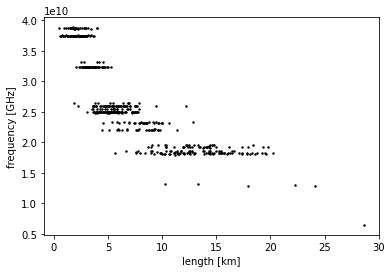

In [12]:
plt.scatter(ds.length.values, ds.frequency.isel(channel_id=0).values, s=2, color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");

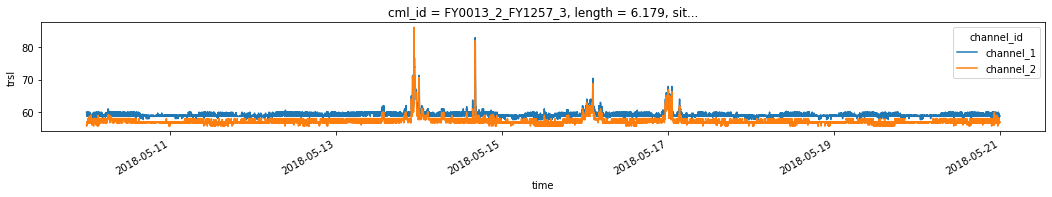

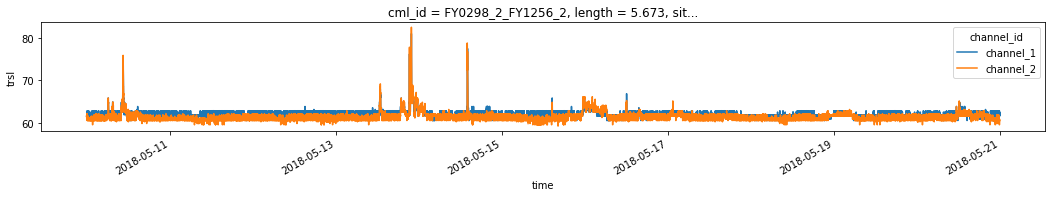

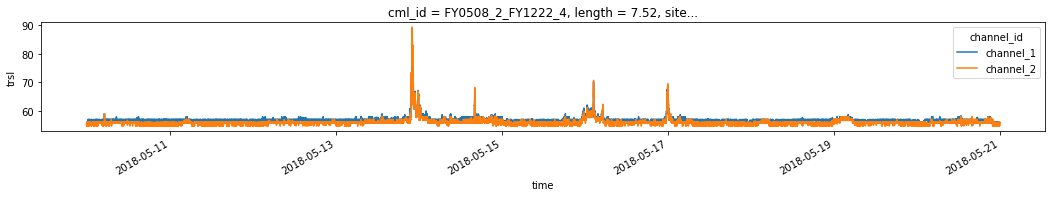

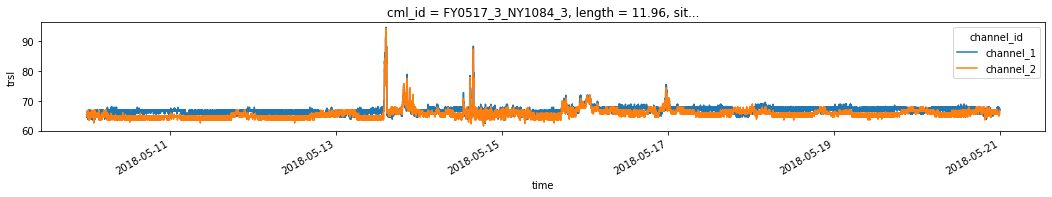

In [13]:
# Set defaul fill values to NaN
ds['tsl'] = ds.tsl.where(ds.tsl != 255.0)
ds['rsl'] = ds.rsl.where(ds.rsl != -99.9)
# Calculate TL
ds['tl'] = ds.tsl - ds.rsl

# Plot
for i in range(4):
    ds.isel(cml_id=i).tl.plot.line(x='time', figsize=(18,2));

# OpenMRG dataset from SMHI with large CML dataset
source: https://zenodo.org/record/6673751

Note that OpenMRG also contains reference data from rain gauges and weather radar data, but for now we focus only on the CML data.

In [10]:
oddt.download_andersson_2022_OpenMRG(local_path='data/andersson_2022_OpenMRG/', print_output=True)

Creating path data/andersson_2022_OpenMRG/
to data/andersson_2022_OpenMRG//OpenMRG.zip


('data/andersson_2022_OpenMRG/OpenMRG.zip',
 <http.client.HTTPMessage at 0x10bd9a920>)

In [11]:
ds = oddt.transform_andersson_2022_OpenMRG(
    fn='data/andersson_2022_OpenMRG/OpenMRG.zip', 
    path_to_extract_to='data/andersson_2022_OpenMRG/',
)

In [4]:
# We chunk that DataArrays here to get dask.arrays instead of numpy arrays.
# This dramatically reduced the RAM needed to to something like ds.tx - ds.rx, 
# which we do below and which might now work on a binder pod with only some
# GB of RAM
ds['tsl'] = ds.tsl.chunk({'sublink': 1})
ds['rsl'] = ds.rsl.chunk({'sublink': 1})

In [5]:
ds

<xarray.Dataset>
Dimensions:           (time: 794887, sublink: 728)
Coordinates:
  * time              (time) datetime64[ns] 2015-05-31T23:59:00 ... 2015-09-01
  * sublink           (sublink) int32 1 2 3 4 5 6 7 ... 723 724 725 726 727 728
    site_a_latitude   (sublink) float64 57.71 57.72 57.78 ... 57.71 57.71 57.71
    site_a_longitude  (sublink) float64 11.91 11.9 12.04 ... 11.94 11.95 11.94
    site_b_latitude   (sublink) float64 57.72 57.71 57.78 ... 57.71 57.71 57.71
    site_b_longitude  (sublink) float64 11.9 11.91 12.04 ... 11.94 11.94 11.95
    frequency         (sublink) float64 38.58 37.32 28.21 ... 37.32 38.5 37.24
    polarization      (sublink) <U10 'Vertical' 'Vertical' ... 'Vertical'
    length            (sublink) float64 1.182 1.182 0.3608 ... 0.3438 0.3438
Data variables:
    tsl               (time, sublink) float32 dask.array<chunksize=(794887, 1), meta=np.ndarray>
    rsl               (time, sublink) float32 dask.array<chunksize=(794887, 1), meta=np.ndarray>
Attributes:
    title:    OpenMRG-CML
    version:  1.1
    source:   Swedish Meteorological and Hydrological Institute (SMHI), Hydro...
    contact:  hydro.fou@smhi.se, jafet.andersson@smhi.se
    license:  https://creativecommons.org/licenses/by-sa/4.0
    doi:      https://doi.org/10.5281/zenodo.6673750
    comment:  Created by Jafet Andersson and Victor Naslund, SMHI. Time is in...

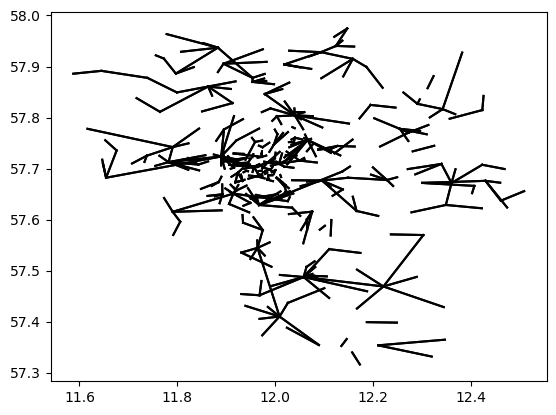

In [6]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds.site_a_longitude, 
    ds.site_a_latitude,
    ds.site_b_longitude, 
    ds.site_b_latitude):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

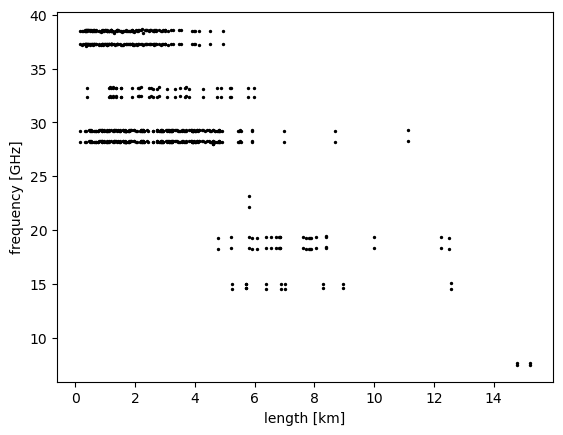

In [7]:
plt.scatter(ds.length.values,ds.frequency.values,s=2,color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");

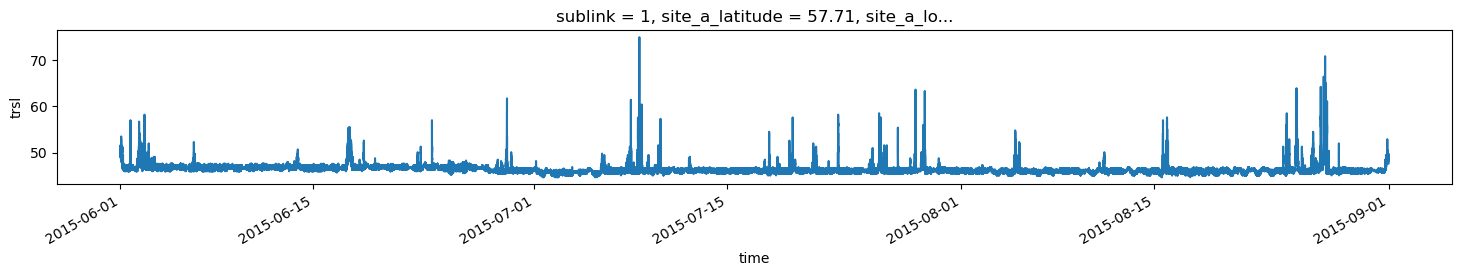

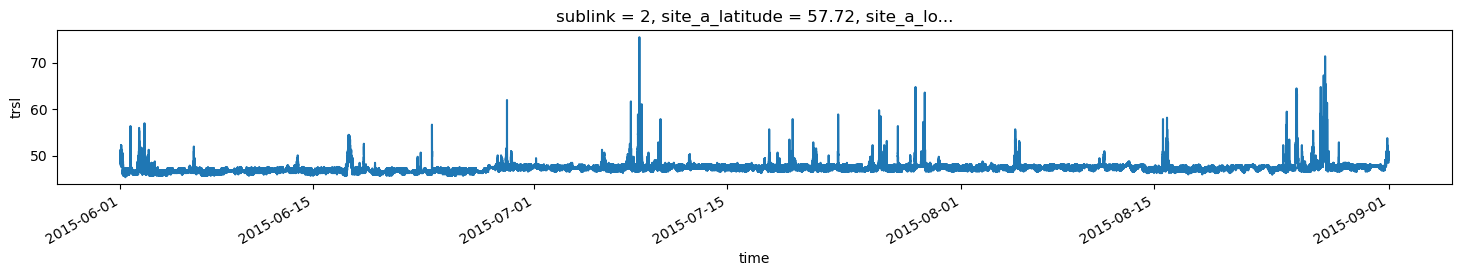

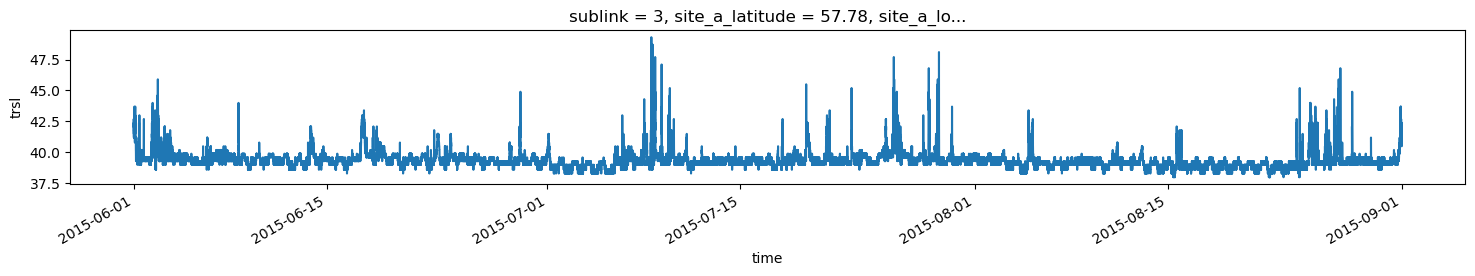

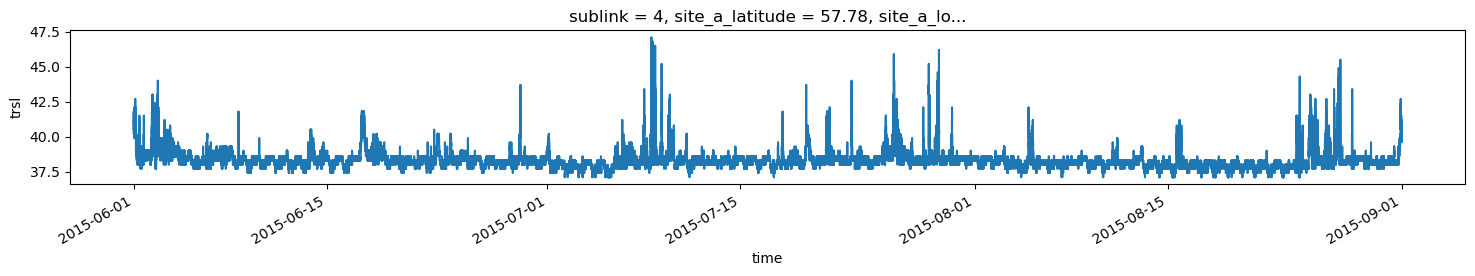

In [8]:
# Calculate TL
ds['tl'] = ds.tsl - ds.rsl

# Plot
for i in range(4):
    ds.isel(sublink=i).tl.plot.line(x='time', figsize=(18,2));

# Large CML dataset from the Netherlands

source: https://data.4tu.nl/articles/dataset/Commercial_microwave_link_data_for_rainfall_monitoring/12688253

In [ ]:
oddt.download_overeem_2019_large_CML_data_Netherlands(
    local_path='data/overeem_2019_large_CML_data_Netherlands', 
    print_output=True,
)

Creating path data/overeem_2019_large_CML_data_Netherlands
to data/overeem_2019_large_CML_data_Netherlands/data.zip


In [ ]:
ds = oddt.transform_overeem_2019_large_CML_data_Netherlands(
    fn='data/overeem_2019_large_CML_data_Netherlands/data.zip', 
    nrows=1e6,
)

In [ ]:
ds

In [ ]:
for lon1, lat1, lon2, lat2 in zip(
    ds.site_a_longitude, 
    ds.site_a_latitude,
    ds.site_b_longitude, 
    ds.site_b_latitude):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

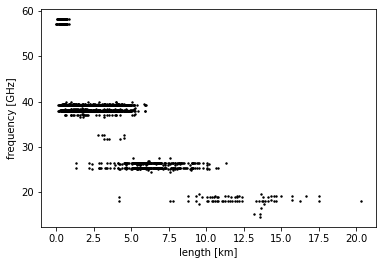

In [24]:
plt.scatter(ds.length.values,ds.frequency.values,s=2,color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");